In [164]:
import string
from threading import local
from matplotlib import pyplot as plt
import numpy as np
import cv2
import json
import numpy as np
from tqdm import tqdm
import os
from statistics import median, mode,mean
import matplotlib.image as img
from matplotlib.ticker import PercentFormatter
from matplotlib import colors
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy.stats as sts

In [165]:
def return_pastframe_combined(data_required ):
    df = pd.DataFrame()
    for x in range(20,len(data_required)):
        df_annotation_list=pd.json_normalize(data_required[x])
        for y in range(1,21):
            newcolname = ('Own_speed_tminus_'+str(20-y)+'_frame')
            df_annotation_list[newcolname] = data_required[int(y)]['OwnSpeed']
            newcolname = ('Distance_ref_tminus'+str(20-y)+'_frame')
            df_annotation_list[newcolname] = data_required[int(y)]['Distance_ref']
            # newcolname = ('StrDeg_tminus'+str(20-y)+'_frame')
            # df_annotation_list[newcolname] = data_required[int(y)]['StrDeg']
        # for y in range(20):
    
        df=pd.concat([df,df_annotation_list])
    return df

In [166]:
def return_pastframe_combined_total(data_required,past_data_frame ):
    df = pd.DataFrame()
    for x in range(len(data_required)):
        df_annotation_list=pd.json_normalize(data_required[x])
        for y in range(1,21):
            newcolname = ('Own_speed_tminus_'+str(20-y)+'_frame')
            newcolname1 = ('Distance_ref_tminus'+str(20-y)+'_frame')
            newcolname2 = ('Relative_speed_tminus'+str(20-y)+'_frame')
            newcolname3 = ('steer_deg_tminus'+str(20-y)+'_frame')
            if(past_data_frame.shape[0]>=int(y)):
            
                df_annotation_list[newcolname] =past_data_frame.iloc[past_data_frame.shape[0]-int(y)]['OwnSpeed']
                df_annotation_list[newcolname1] = past_data_frame.iloc[past_data_frame.shape[0]-int(y)]['Distance_ref']
                df_annotation_list[newcolname3] = past_data_frame.iloc[past_data_frame.shape[0]-int(y)]['StrDeg']
                df_annotation_list[newcolname2]=(past_data_frame.iloc[past_data_frame.shape[0]-int(y)-1]['Distance_ref']-past_data_frame.iloc[past_data_frame.shape[0]-int(y)]['Distance_ref'])/10
            else:
                df_annotation_list[newcolname]=0
                df_annotation_list[newcolname1]=0
                df_annotation_list[newcolname2]=0
                df_annotation_list[newcolname3]=0
            
            # newcolname = ('StrDeg_tminus'+str(20-y)+'_frame')
            # df_annotation_list[newcolname] = data_required[int(y)]['StrDeg']
        # for y in range(20):
    
        df=pd.concat([df,df_annotation_list])
    return df

In [209]:
annotation_path = "../train_annotations/"
dir_list = os.listdir(annotation_path)
dir_list.sort()
df = pd.DataFrame()
for inddir in tqdm(dir_list,desc='dirs'):
    if(0==0):
#     inddir="420.json"
        f = open(annotation_path+inddir)
        data = json.load(f)
        # print(len(data))
        # print(len(raw_file_list))
        local_distance = return_pastframe_combined_total(data['sequence'],df)
        # print(local_distance)
        df=pd.concat([df,local_distance])
    # else:
    #     f = open(annotation_path+inddir)
    #     data = json.load(f)
    #     # print(len(data))
    #     # print(len(raw_file_list))
    #     local_distance = return_pastframe_combined_total(data['sequence'],df)
    #     # print(local_distance)
    #     df=pd.concat([df,local_distance])

dirs: 100%|██████████| 737/737 [27:33<00:00,  2.24s/it]


In [168]:
df

OwnSpeed  StrDeg    inf_DP  Distance_ref  TgtSpeed_ref  TgtXPos_LeftUp  \
0       28.7    -0.7  5.743652         24.76         30.32           433.0   
0       28.9    -0.7  5.743652         24.81         30.62           434.0   
0       29.1    -0.9  5.743652         24.86         30.89           434.0   
0       29.3    -1.2  5.743652         24.91         31.19           435.0   
0       29.5    -2.1  5.743652         24.96         31.45           436.0   
..       ...     ...       ...           ...           ...             ...   
0       36.0     0.3  5.739014         28.48         29.74           430.0   
0       35.7     0.3  5.739014         28.31         29.78           430.0   
0       35.4     0.3  5.739014         28.12         29.75           430.0   
0       35.1     0.3  5.739014         27.95         29.64           430.0   
0       34.8     0.3  5.739014         27.78         29.54           430.0   

    TgtYPos_LeftUp  TgtWidth  TgtHeight  Own_speed_tminus_19_frame  ...  \
0            107.0     107.0       97.0                        0.0  ...   
0            107.0     107.0       98.0                        0.0  ...   
0            108.0     106.0       98.0                        0.0  ...   
0            108.0     106.0       99.0                        0.0  ...   
0            110.0     107.0       98.0                        0.0  ...   
..             ...       ...        ...                        ...  ...   
0             63.0     116.0      115.0                       41.4  ...   
0             63.0     116.0      116.0                       41.4  ...   
0             64.0     116.0      117.0                       41.4  ...   
0             63.0     117.0      118.0                       41.4  ...   
0             61.0     117.0      119.0                       41.4  ...   

    Relative_speed_tminus2_frame  steer_deg_tminus2_frame  \
0                          0.000                      0.0   
0                          0.000                      0.0   
0                          0.000                      0.0   
0                          0.000                      0.0   
0                          0.000                      0.0   
..                           ...                      ...   
0                          0.034                      4.3   
0                          0.034                      4.3   
0                          0.034                      4.3   
0                          0.034                      4.3   
0                          0.034                      4.3   

    Own_speed_tminus_1_frame  Distance_ref_tminus1_frame  \
0                        0.0                         0.0   
0                        0.0                         0.0   
0                        0.0                         0.0   
0                        0.0                         0.0   
0                        0.0                         0.0   
..                       ...                         ...   
0                       46.4                        34.2   
0                       46.4                        34.2   
0                       46.4                        34.2   
0                       46.4                        34.2   
0                       46.4                        34.2   

    Relative_speed_tminus1_frame  steer_deg_tminus1_frame  \
0                          0.000                      0.0   
0                          0.000                      0.0   
0                          0.000                      0.0   
0                          0.000                      0.0   
0                          0.000                      0.0   
..                           ...                      ...   
0                          0.031                      4.3   
0                          0.031                      4.3   
0                          0.031                      4.3   
0                          0.031                      4.3   
0                          0.031         

In [228]:
!pip install catboost


     |████████████████████████████████| 76.6 MB 102.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 1.0 MB/s eta 0:00:011


In [229]:
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [230]:
Y=df['TgtSpeed_ref']
X=df.drop(columns=['TgtSpeed_ref'])

In [299]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.10)

In [300]:
params={

    'task':['train'],
    'boosting':['gbdt','goss','dart','rf'],
    'objective':['regression'],
    'num_leaves':[7,10,15,31],
    'iterations': [100,500,1000,2000,4000],
    'learning_rate':[0.1,0.05,0.01,0.005,0.001],
    'max_depth':[10,15,25],
    'feature_fraction':[0.6,0.8,0.9],
}

In [301]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [302]:
lgb_model=lgb.LGBMRegressor()
gsearch_lgb=GridSearchCV(lgb_model,param_grid=params, n_jobs=6,verbose=10)
gsearch_lgb.fit(x_train,y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
[CV 1/5; 1/3600] START boosting=gbdt, feature_fraction=0.6, iterations=100, learning_rate=0.1, max_depth=10, num_leaves=7, objective=regression, task=train
[CV 2/5; 1/3600] START boosting=gbdt, feature_fraction=0.6, iterations=100, learning_rate=0.1, max_depth=10, num_leaves=7, objective=regression, task=train
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[CV 3/5; 1/3600] START boosting=gbdt, feature_fraction=0.6, iterations=100, learning_rate=0.1, max_depth=10, num_leaves=7, objective=regression, task=train
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] fea

KeyboardInterrupt: 

In [303]:
params = {'boosting': 'gbdt', 'feature_fraction': 0.9, 
          'learning_rate': 0.05, 'max_depth': 25, 'num_leaves': 31, 
          'objective': 'regression', 'task': 'train',
          'metric': {'l2', 'l1'},
          'verbose': -1}


In [304]:
lgb_train=lgb.Dataset(x_train,y_train)
lgb_eval=lgb.Dataset(x_test,y_test, reference=lgb_train)

In [305]:
print(gsearch_lgb.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [259]:
# model=CatBoostRegressor(learning_rate=0.05, iterations=5000, boosting_type='Ordered', devices="cuda")
# model.fit(x_train,y_train,plot=True, eval_set=(x_test,y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 26.1191595	test: 26.0076057	best: 26.0076057 (0)	total: 34.4ms	remaining: 2m 52s
1:	learn: 24.9615091	test: 24.8588677	best: 24.8588677 (1)	total: 68.6ms	remaining: 2m 51s
2:	learn: 23.8539391	test: 23.7550240	best: 23.7550240 (2)	total: 105ms	remaining: 2m 54s
3:	learn: 22.7944136	test: 22.7024964	best: 22.7024964 (3)	total: 139ms	remaining: 2m 53s
4:	learn: 21.7956796	test: 21.7096656	best: 21.7096656 (4)	total: 176ms	remaining: 2m 56s
5:	learn: 20.8532226	test: 20.7753681	best: 20.7753681 (5)	total: 211ms	remaining: 2m 55s
6:	learn: 19.9700491	test: 19.8974218	best: 19.8974218 (6)	total: 253ms	remaining: 3m
7:	learn: 19.1169880	test: 19.0516348	best: 19.0516348 (7)	total: 287ms	remaining: 2m 59s
8:	learn: 18.3299896	test: 18.2671652	best: 18.2671652 (8)	total: 323ms	remaining: 2m 58s
9:	learn: 17.5728020	test: 17.5131276	best: 17.5131276 (9)	total: 357ms	remaining: 2m 58s
10:	learn: 16.8638079	test: 16.8117608	best: 16.8117608 (10)	total: 392ms	remaining: 2m 57s
11:	learn:

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': True,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.10091900080442429,
 'score_function': 'C

In [306]:
model = lgb.train(params,train_set=lgb_train, valid_sets=lgb_eval, early_stopping_rounds=40,num_boost_round=1000)



/home/bikram/.local/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 678.466	valid_0's l1: 23.1635
Training until validation scores don't improve for 40 rounds
[2]	valid_0's l2: 616.089	valid_0's l1: 22.0101
[3]	valid_0's l2: 567.506	valid_0's l1: 21.0072
[4]	valid_0's l2: 515.928	valid_0's l1: 19.964
[5]	valid_0's l2: 469.215	valid_0's l1: 18.972
[6]	valid_0's l2: 427.059	valid_0's l1: 18.0318
[7]	valid_0's l2: 388.948	valid_0's l1: 17.1416
[8]	valid_0's l2: 354.537	valid_0's l1: 16.297
[9]	valid_0's l2: 323.329	valid_0's l1: 15.4957
[10]	valid_0's l2: 295.266	valid_0's l1: 14.738
[11]	valid_0's l2: 269.869	valid_0's l1: 14.0227
[12]	valid_0's l2: 250.336	valid_0's l1: 13.4118
[13]	valid_0's l2: 229.177	valid_0's l1: 12.7711
[14]	valid_0's l2: 210.16	valid_0's l1: 12.165
[15]	valid_0's l2: 192.836	valid_0's l1: 11.5923
[16]	valid_0's l2: 177.195	valid_0's l1: 11.0503
[17]	valid_0's l2: 163.094	valid_0's l1: 10.5399
[18]	valid_0's l2: 150.255	valid_0's l1: 10.0634
[19]	valid_0's l2: 138.58	valid_0's l1: 9.61541
[20]	valid_0's l2: 128.0

In [307]:
y_pred = model.predict(x_test)

mse= mean_squared_error(y_test,y_pred)
rmse=mse**(0.5)

print(mse)
print(rmse)

1.83636768547806
1.3551264463060486


without Past_features:
0.026873281268037348
0.16393072094039404

with past features (49 dimensions):
0.01654579482807164
0.12863045839952386

In [261]:
6.396120048430478
2.529055169115628

2.529055169115628

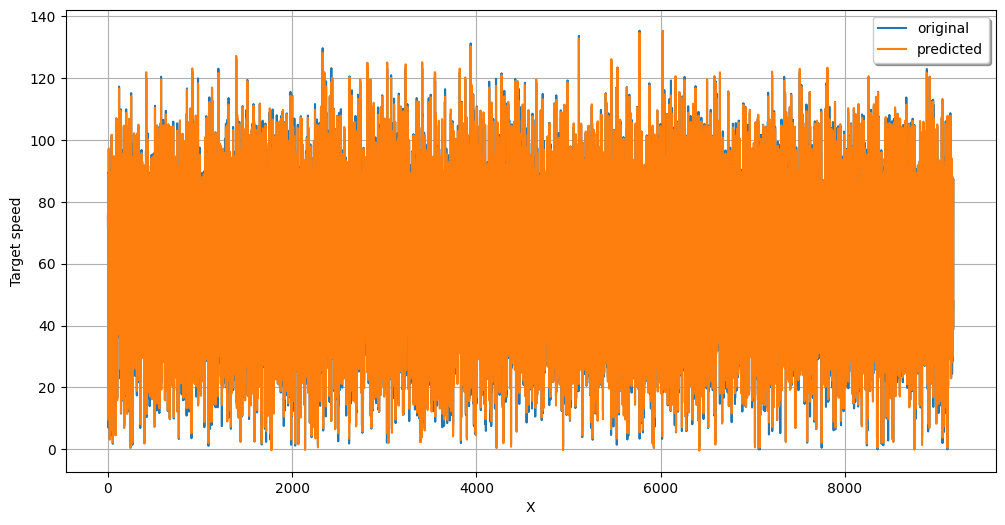

In [308]:
x_ax=range(len(y_test))
plt.figure(figsize=(12,6))
plt.plot(x_ax,y_test,label="original")
plt.plot(x_ax,y_pred,label="predicted")
plt.xlabel('X')
plt.ylabel('Target speed')
plt.legend(loc='best',fancybox=True,shadow=True)
plt.grid(True)
plt.show()

In [309]:
y_pred=np.array(y_pred)
y_test=np.array(y_test)
for x in range(len(y_pred)):
    print(str(y_pred[x])+"--------"+str(y_test[x]))

75.96957124755403--------75.09
71.84606260980281--------71.57
81.913077017961--------81.47
21.20390383707823--------22.8
88.8820489536067--------89.34
63.217670495449354--------61.97
80.85654985443419--------83.89
9.517117819718004--------6.94
77.89501523109476--------78.62
16.594766398239532--------17.5
97.2463246174174--------96.93
30.494321603455667--------33.31
73.69040009893091--------73.71
51.53325814679168--------50.49
17.069400395062225--------14.15
44.41428247304199--------45.24
38.9349722791482--------38.85
43.582513505081515--------39.04
43.1098059268976--------43.89
37.89952828866573--------36.71
3.1313024409143995--------3.31
86.86210307868866--------87.82
35.46341641422783--------34.77
85.59003739731678--------87.38
84.65079650549012--------83.74
52.368572051494404--------52.52
89.65061552296818--------90.1
39.67166699733234--------37.61
15.801725801359925--------14.02
88.29810940510112--------87.66
6.2246002710755475--------4.5
87.94326797745259--------88.53
42.881269582

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

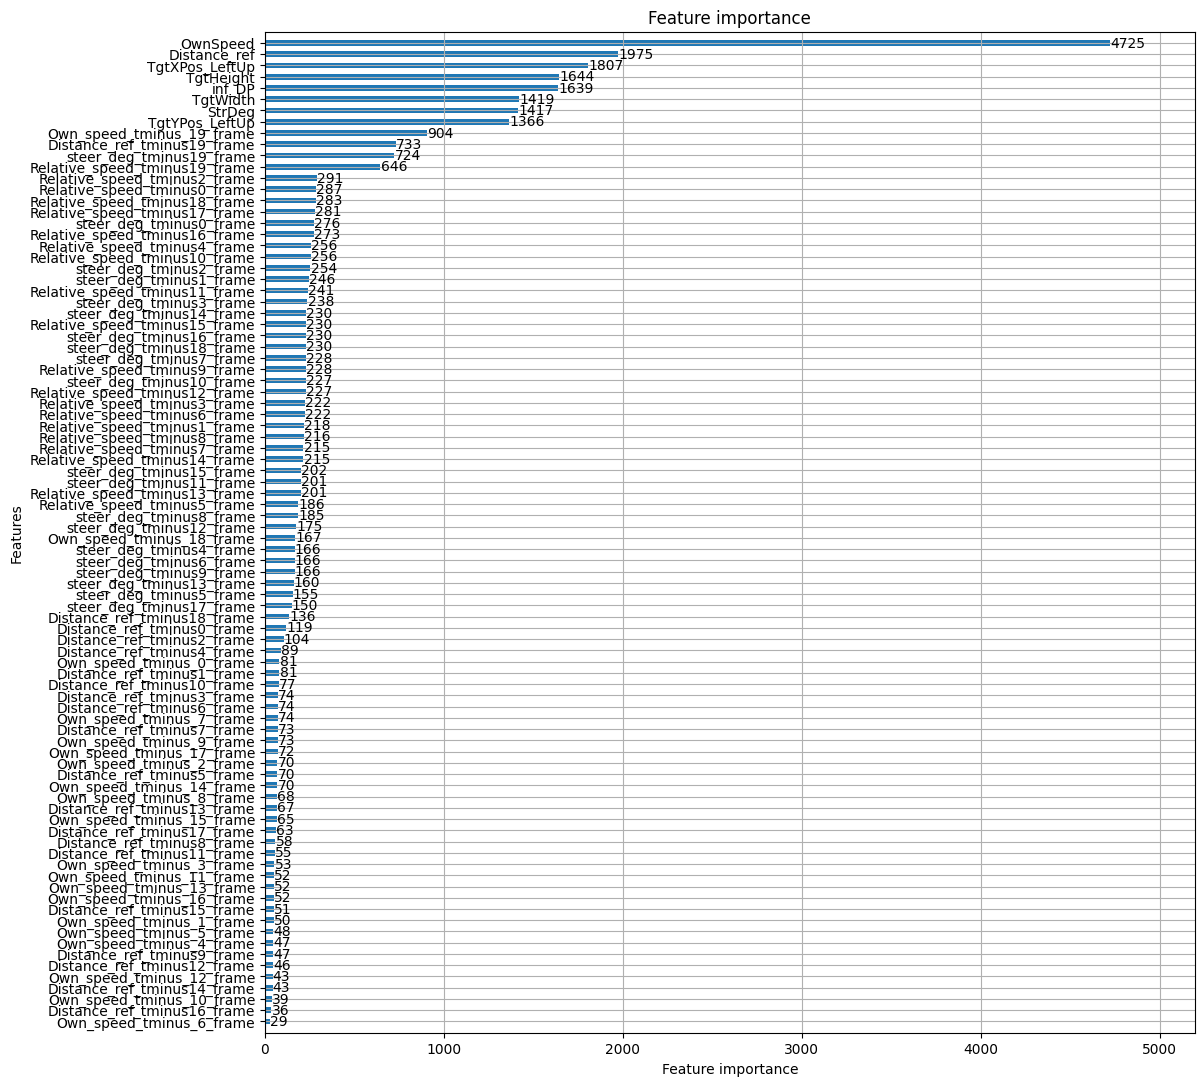

In [310]:
lgb.plot_importance(model,height=.5,figsize=(12,13))

In [246]:
print(model.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': True, 'random_seed': 0, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'RMSE', 'learning_rate': 0.10091900080442429, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_

In [311]:
annotation_path = "../../complete_test_annotations_2/"
dir_list = os.listdir(annotation_path)
dir_list.sort()
df1 = pd.DataFrame()
import json
frame_id, speed=[],[]
for inddir in tqdm(dir_list,desc='dirs'):
# if(1==1):
    if(0==0):
#     inddir="420.json"
        f = open(annotation_path+inddir)
        data = json.load(f)
        # print(len(data))
        # print(len(raw_file_list))
        local_distance = return_pastframe_combined_total(data,df)
        # # print(local_distance)
        # local_distance=(local_distance-local_distance.min())/(local_distance.max()-local_distance.min())
        y_test_pred=model.predict(local_distance)
        y_test_pred_decimal=[ round(elem, 1) for elem in y_test_pred ]

        frame_id.append(inddir[0:3])
        speed.append(y_test_pred_decimal)
    # else:
    #     f = open(annotation_path+inddir)
    #     data = json.load(f)
    #     # print(len(data))
    #     # print(len(raw_file_list))
    #     local_distance = return_pastframe_combined_total(data,df)
    #     y_test_pred=model.predict(local_distance)
    #     y_test_pred_decimal=[ round(elem, 1) for elem in y_test_pred ]

    #     frame_id.append(inddir[0:3])
    #     speed.append(y_test_pred_decimal)
    # f = open(annotation_path+inddir)
    # data = json.load(f)
    # # print(len(data))
    # # print(len(raw_file_list))
    # local_distance = return_pastframe_combined(data)
    # # print(local_distance)
    # y_test_pred=model.predict(local_distance)
    # y_test_pred_decimal=[ round(elem, 2) for elem in y_test_pred ]

    # frame_id.append(inddir[0:3])
    # speed.append(y_test_pred_decimal)
    

dirs: 100%|██████████| 239/239 [07:16<00:00,  1.83s/it]


In [296]:
final_json=[{t:s} for t,s in zip(frame_id,speed)]
print(final_json[0:5])

[{'000': [34.3, 34.2, 33.1, 33.4, 32.9, 32.7, 33.0, 31.2, 31.3, 30.9, 30.9, 30.7, 30.8, 32.1, 32.1, 32.3, 32.3, 32.1, 32.1, 30.9, 30.6, 30.9, 29.9, 29.9, 29.9, 27.1, 25.3, 24.9, 25.1, 25.0, 26.0, 23.9, 24.8, 24.8, 24.9, 22.4, 24.3, 23.9, 23.1, 22.9, 21.3, 21.8, 21.8, 20.4, 19.9, 19.6, 19.5, 17.8, 20.1, 18.9, 17.3, 17.2, 18.2, 17.5, 18.1, 18.1, 18.1, 18.6, 18.9, 18.1, 17.9, 18.6, 18.9, 18.9, 18.4, 18.7, 18.1, 17.8, 16.6, 16.0, 16.0, 17.2, 16.2, 14.5, 15.3, 13.6, 15.2, 15.2, 15.9, 16.3, 16.7, 17.1, 17.8, 15.7, 16.5, 15.6, 15.4, 15.5, 15.5, 15.5, 15.7, 16.5, 15.8, 17.8, 17.2, 15.4, 16.9, 17.9, 16.9, 17.9, 16.7, 16.7, 16.4, 15.1, 14.0, 14.0, 14.0, 11.5, 11.5, 11.3, 11.8, 11.3, 10.7, 11.5, 11.4, 11.5, 11.6, 11.5, 11.5, 11.5, 10.9]}, {'001': [28.0, 28.0, 28.0, 30.5, 30.5, 30.4, 28.9, 29.5, 28.6, 28.8, 28.7, 29.4, 29.4, 29.4, 29.6, 29.6, 29.4, 29.5, 29.5, 29.5, 29.5, 29.9, 32.0, 32.0, 34.5, 34.4, 34.5, 34.4, 34.3, 34.9, 34.0, 34.0, 34.0, 35.1, 35.1, 35.1, 35.1, 34.6, 34.1, 34.8, 34.9, 35.1, 3

In [297]:
submission_results=json.dumps(final_json)
with open("1st_submission.json","w") as outfile:
    outfile.write(submission_results)

In [298]:
y_test_pred

array([40.51461941, 40.52808296, 41.6698964 , 41.883989  , 41.883989  ,
       41.91168749, 42.03640675, 43.39237567, 43.39237567, 43.39237567,
       43.39237567, 43.95236196, 43.95236196, 43.95236196, 45.15437704,
       45.15437704, 44.81556518, 44.81556518, 45.0352396 , 45.0352396 ,
       45.0352396 , 45.0352396 , 45.0352396 , 45.0352396 , 45.0352396 ,
       45.0352396 , 45.0352396 , 45.0352396 , 45.0352396 , 45.0352396 ,
       45.0352396 , 45.35567574, 45.16686515, 45.16686515, 45.16686515,
       45.02823406, 45.02823406, 45.02823406, 45.02823406, 45.36704591,
       45.67169822, 44.95746968, 44.92877404, 44.92877404, 45.42051014,
       44.92877404, 45.06740514, 45.55914124, 45.55914124, 45.38734517,
       45.38734517, 45.38734517, 45.25571962, 45.38734517, 45.38734517,
       45.38734517, 45.24871407, 45.24871407, 45.66932845, 45.66932845,
       45.66932845, 44.94709299, 44.95354633, 44.65662614, 44.65662614,
       44.78412568, 44.78412568, 44.77767234, 44.78412568, 44.78

In [ ]:
31.6, 31.3, 29.2, 30.3, 30.8, 27.2, 28.3, 26.3, 26.3, 22.5,